In [66]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_aer import AerSimulator
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile,execute, Aer
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_aer import AerSimulator
import networkx as nx
from qiskit.algorithms.optimizers import COBYLA
# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options
from qiskit.utils import algorithm_globals
# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive inside a session. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# with Session(backend=service.backend("ibmq_qasm_simulator")):
#     result = Sampler().run(circuits).result()
# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive inside a session. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# with Session(backend=service.backend("ibmq_qasm_simulator")):
#     result = Sampler().run(circuits).result()

In [67]:

from qiskit.circuit.quantumcircuit import QuantumCircuit
from qiskit.circuit.library.n_local.qaoa_ansatz import QAOAAnsatz

        

In [125]:
from qiskit import Aer
#from qiskit.optimization.applications.ising import tsp
from qiskit_optimization.applications import Tsp
#from qiskit.aqua.algorithms import NumPyMinimumEigensolver, QAOA
from qiskit.algorithms.minimum_eigensolvers import QAOA , NumPyMinimumEigensolver
#from qiskit.aqua import aqua_globals, QuantumInstance
from qiskit.utils import QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
#from qiskit.optimization.problems import QuadraticProgram
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit.primitives import Sampler
from qiskit.circuit.library.n_local.qaoa_ansatz import QAOAAnsatz
from qiskit.quantum_info.operators import Operator # Generating a TSP instance of n cities
n = 3
num_qubits = n ** 2
tsp =Tsp.create_random_instance(n, seed=122)
adj_matrix = nx.to_numpy_array(tsp.graph)
print("distance\n", adj_matrix)

# Create a random TSP Hamiltonian
qp = tsp.to_quadratic_program()
print(qp.prettyprint())

qp2qubo = QuadraticProgramToQubo()
qubo = qp2qubo.convert(qp)
qubitOp, offset = qubo.to_ising()
print(qubitOp, offset)




distance
 [[ 0. 45. 33.]
 [45.  0. 53.]
 [33. 53.  0.]]
Problem name: TSP

Minimize
  45*x_0_0*x_1_1 + 45*x_0_0*x_1_2 + 33*x_0_0*x_2_1 + 33*x_0_0*x_2_2
  + 45*x_0_1*x_1_0 + 45*x_0_1*x_1_2 + 33*x_0_1*x_2_0 + 33*x_0_1*x_2_2
  + 45*x_0_2*x_1_0 + 45*x_0_2*x_1_1 + 33*x_0_2*x_2_0 + 33*x_0_2*x_2_1
  + 53*x_1_0*x_2_1 + 53*x_1_0*x_2_2 + 53*x_1_1*x_2_0 + 53*x_1_1*x_2_2
  + 53*x_1_2*x_2_0 + 53*x_1_2*x_2_1

Subject to
  Linear constraints (6)
    x_0_0 + x_0_1 + x_0_2 == 1  'c0'
    x_1_0 + x_1_1 + x_1_2 == 1  'c1'
    x_2_0 + x_2_1 + x_2_2 == 1  'c2'
    x_0_0 + x_1_0 + x_2_0 == 1  'c3'
    x_0_1 + x_1_1 + x_2_1 == 1  'c4'
    x_0_2 + x_1_2 + x_2_2 == 1  'c5'

  Binary variables (9)
    x_0_0 x_0_1 x_0_2 x_1_0 x_1_1 x_1_2 x_2_0 x_2_1 x_2_2

-826.0 * IIIIIIIIZ
- 826.0 * IIIIIIIZI
- 826.0 * IIIIIIZII
- 836.0 * IIIIIZIII
- 836.0 * IIIIZIIII
- 836.0 * IIIZIIIII
- 830.0 * IIZIIIIII
- 830.0 * IZIIIIIII
- 830.0 * ZIIIIIIII
+ 393.5 * IIIIIIIZZ
+ 393.5 * IIIIIIZIZ
+ 393.5 * IIIIIIZZI
+ 393.5 * IIIIIZIIZ
+

In [126]:
from qiskit.circuit import QuantumCircuit, ParameterVector
import numpy as np
# The below code is the implementation for QAOA+ Problem Independent Appended Layer the phase angles are set to be 
# random between pi/2 and -pi/2. (phase parameter can be changed)

#I n order to run QAOA+ this layer must be added after simple qaoa layer.
#9 qubit for 3 node tsp and 16 for 4 node tsp 




In [127]:

circuit = QAOAAnsatz( cost_operator=qubitOp, reps=1)
circuit =circuit.decompose( reps=3)
'''p =1
alpha = ParameterVector('α', length=(1))
circuit.barrier()
for i in range(num_qubits - 1):
    circuit.crz(alpha[0], i, i+1)

        

# Apply X gates to all qubits

circuit.x(range(num_qubits))
circuit.bind_parameters({alpha[0] : 1}).draw()'''



"p =1\nalpha = ParameterVector('α', length=(1))\ncircuit.barrier()\nfor i in range(num_qubits - 1):\n    circuit.crz(alpha[0], i, i+1)\n\n        \n\n# Apply X gates to all qubits\n\ncircuit.x(range(num_qubits))\ncircuit.bind_parameters({alpha[0] : 1}).draw()"

In [128]:
circuit.parameters


ParameterView([ParameterVectorElement(β[0]), ParameterVectorElement(γ[0])])

In [129]:
#bind_dict = {}
#param = [1.1,2.1]
#for i in range(0,2):
#    for key in circuit.parameters:
#        bind_dict[key] = param[0]

    

#circuit.bind_parameters(bind_dict)
bind_dict = {}
param = [1.1, 2.1]
for i, key in enumerate(circuit.parameters):
    bind_dict[key] = param[i]
    
circuit.bind_parameters(bind_dict)



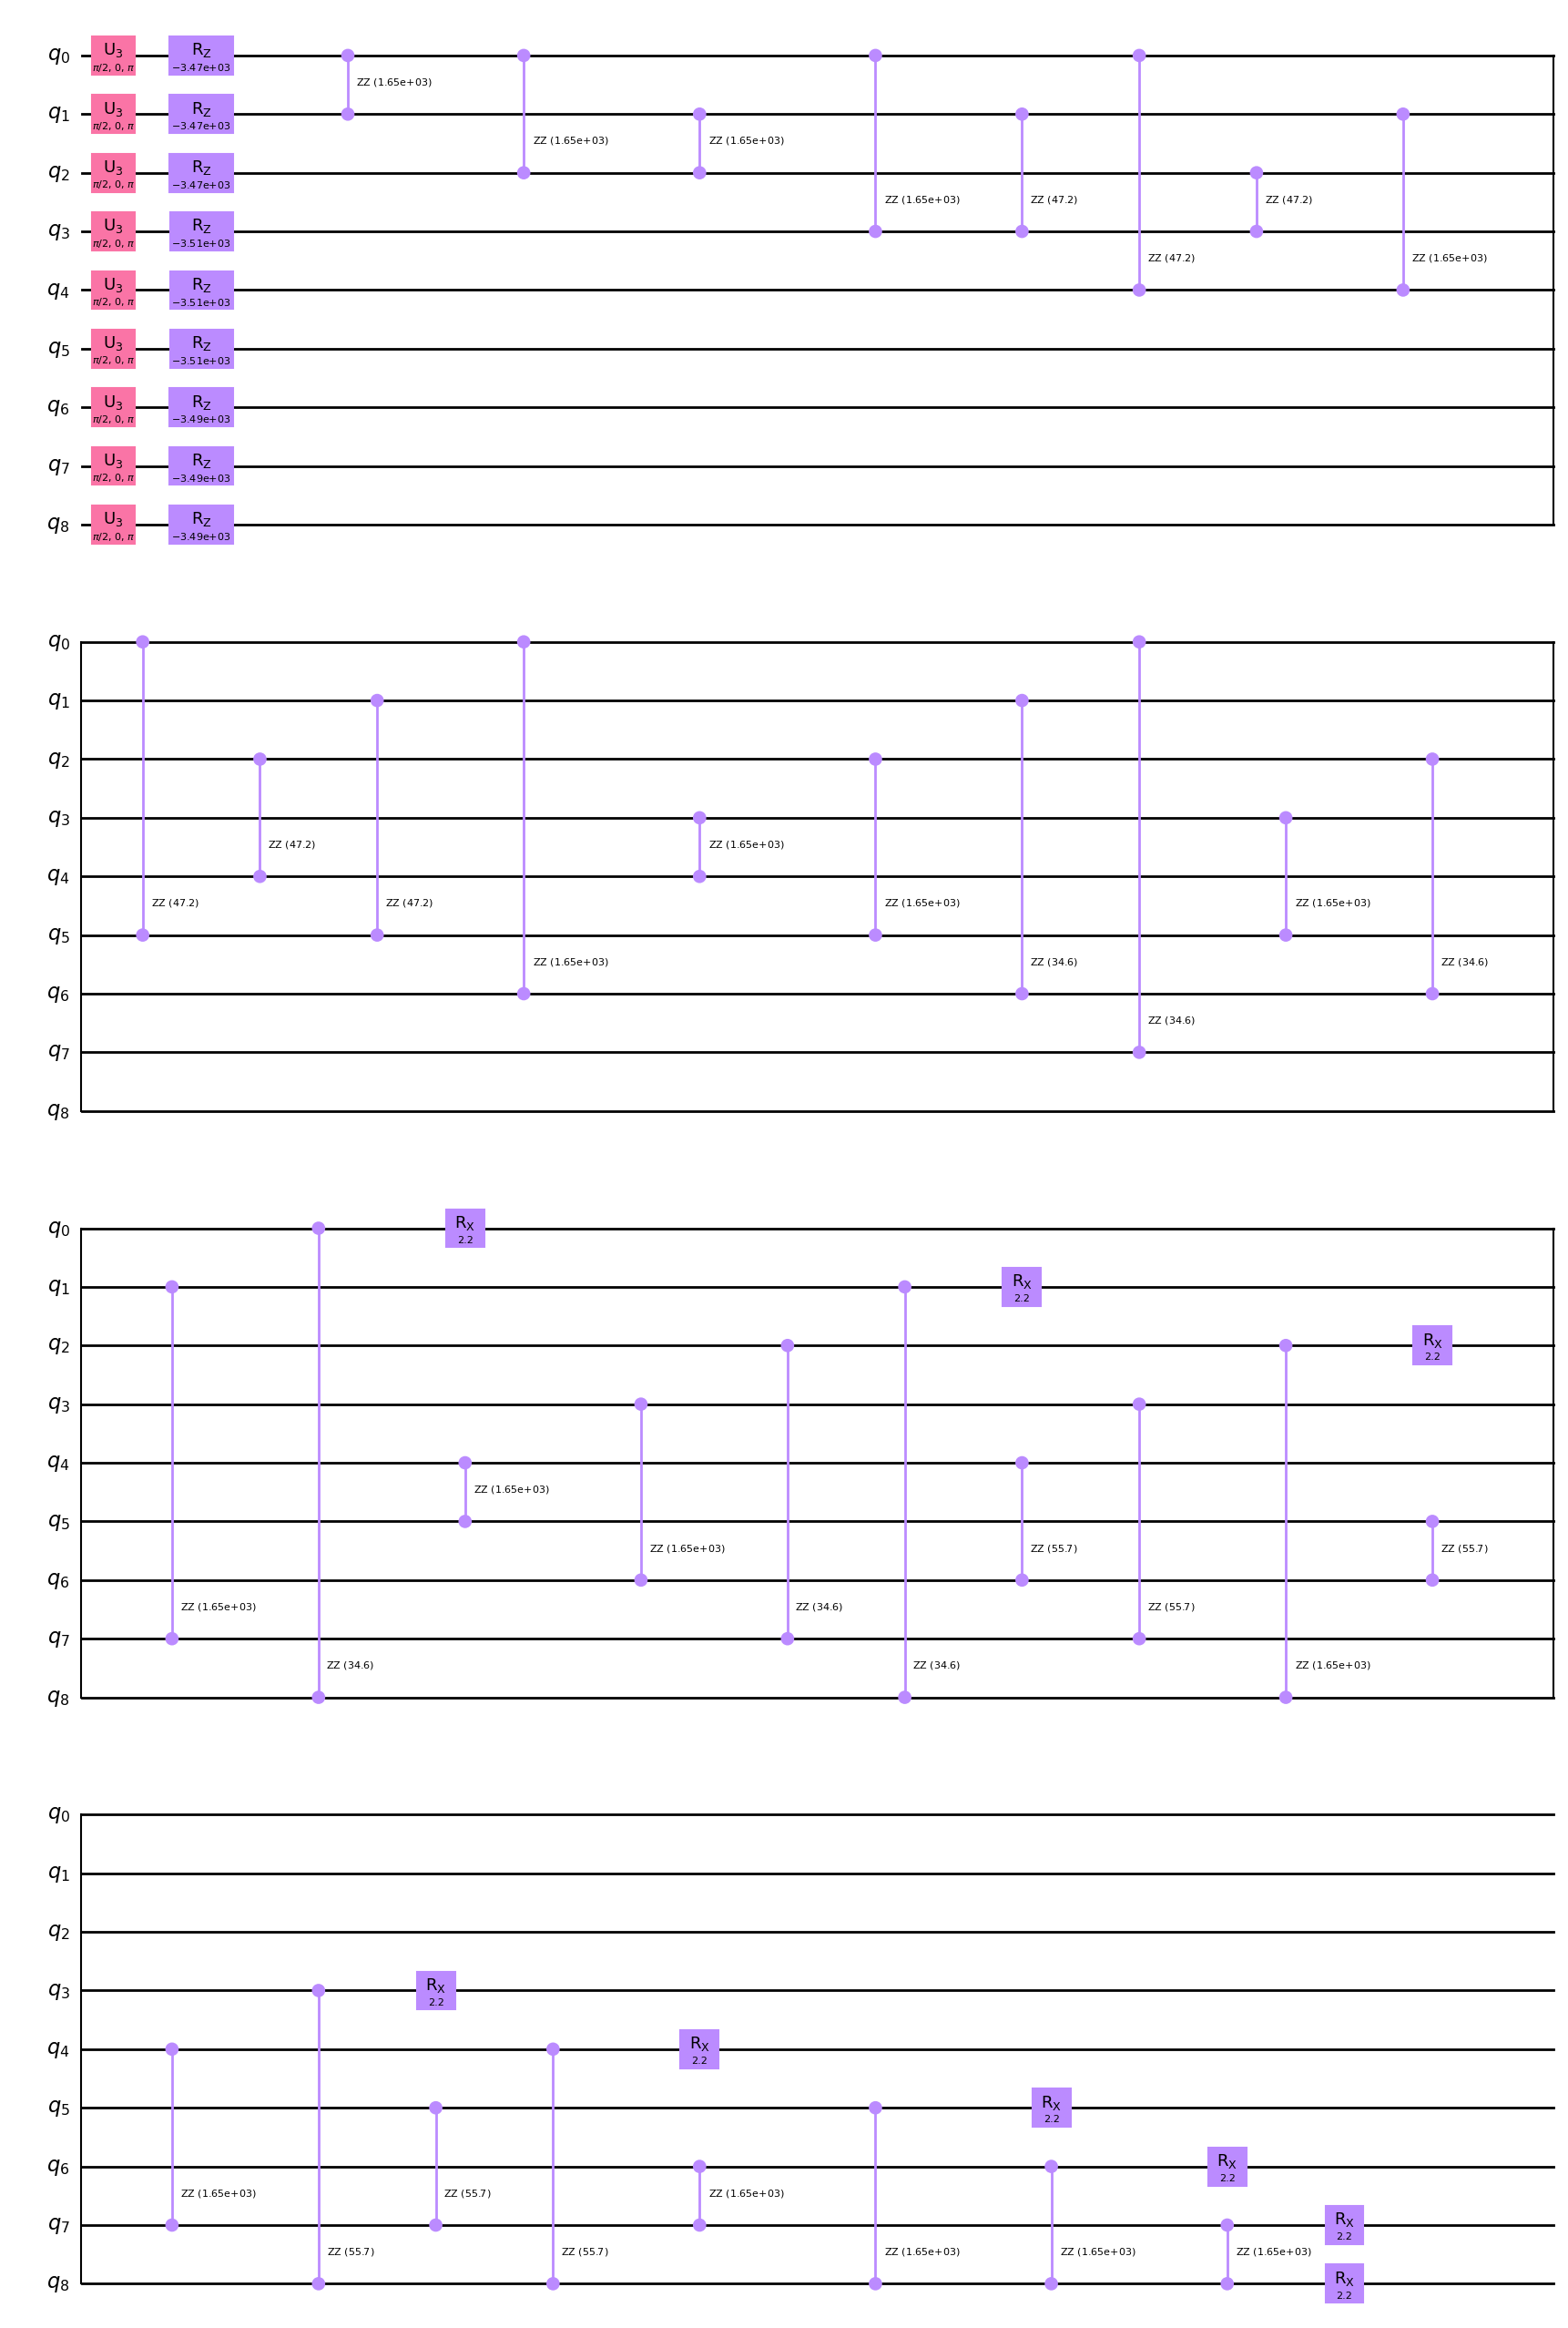

In [130]:
circuit.bind_parameters(bind_dict).draw()

In [131]:
circuit.measure_all()

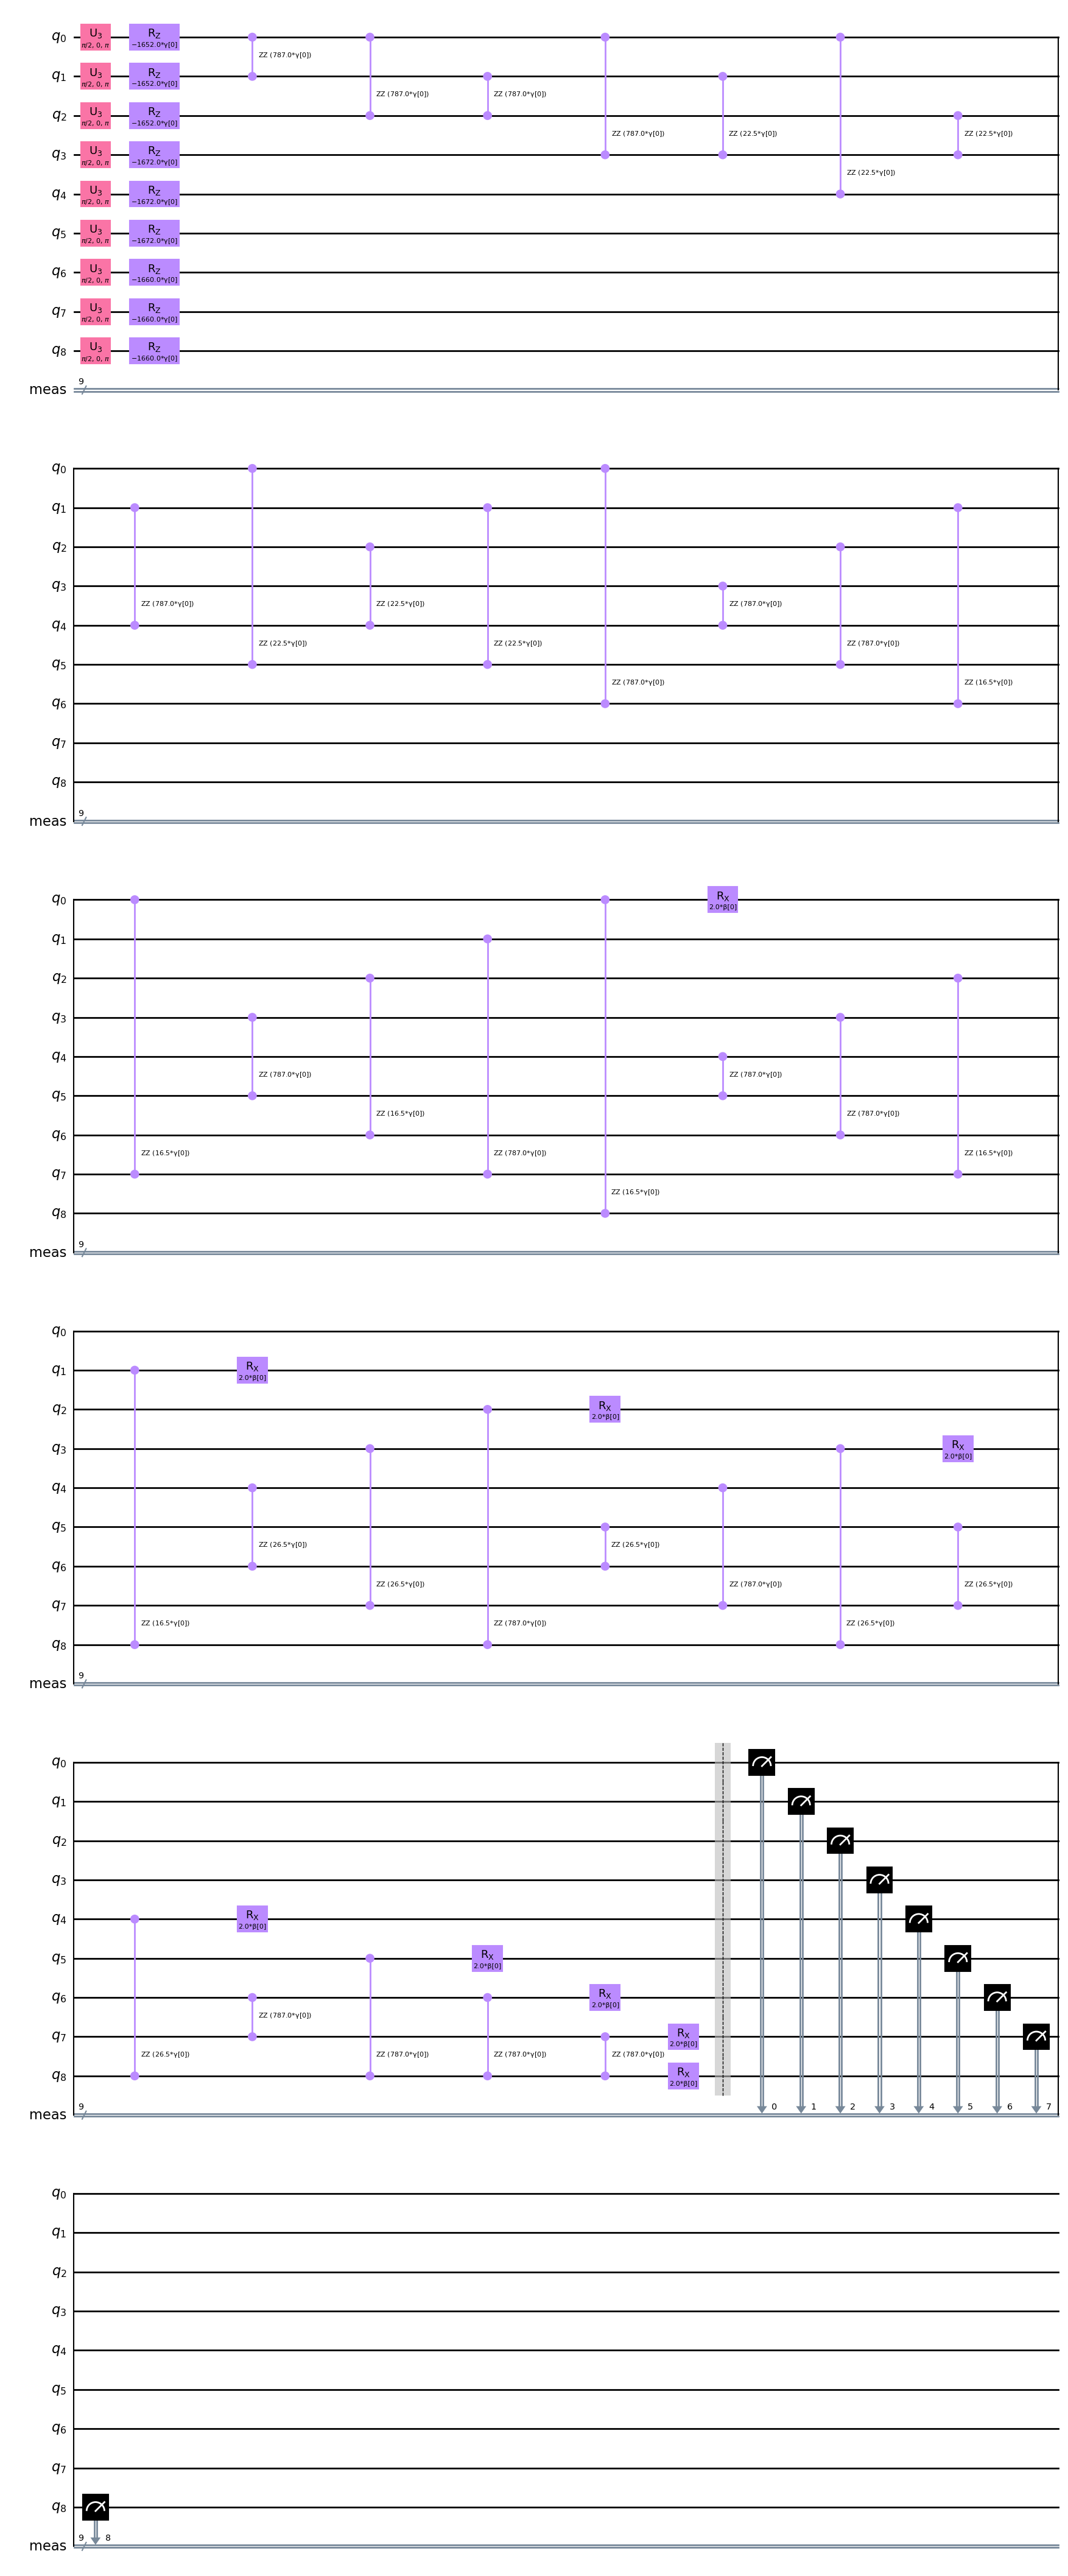

In [132]:
circuit.draw()

In [133]:
def invert_counts(counts):
    return {k[::-1]:v for k, v in counts.items()}

In [134]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend)
result = job.result()
print(invert_counts(result.get_counts()))
plot_histogram(job.result().get_counts())
counts =invert_counts(result.get_counts())
# Find the highest count and its corresponding outcome
highest_count = 0
highest_outcome = None

# Dictionary to store the count occurrences
count_occurrences = {}

for outcome, count in counts.items():
    if count > highest_count:
        highest_count = count
        highest_outcome = outcome
    
    # Update count occurrences
    if count in count_occurrences:
        count_occurrences[count].append(outcome)
    else:
        count_occurrences[count] = [outcome]

print("Highest Count:", highest_count)
print("Highest Outcome:", highest_outcome)

# Find the lowest count and its corresponding outcome
lowest_count = float('inf')
lowest_outcome = None

for outcome, count in counts.items():
    if count < lowest_count:
        lowest_count = count
        lowest_outcome = outcome

print("Lowest Count:", lowest_count)
print("Lowest Outcome:", lowest_outcome)

# Show count occurrences
print("Count Occurrences:")
for count, outcomes in count_occurrences.items():
    print("Count:", count)
    print("Occurrences:", len(outcomes))
    print("Outcomes:", outcomes)
    print()


{'001101000': 1, '101100101': 1, '111101101': 1, '000001010': 1, '001000010': 1, '000100010': 1, '001010110': 1, '100010101': 1, '010101100': 1, '110001010': 2, '101101001': 1, '011001000': 1, '101100001': 2, '001010010': 1, '111100001': 1, '011001110': 1, '001100001': 2, '001101001': 1, '001010100': 1, '010011100': 1, '100111001': 1, '011101101': 1, '011000111': 1, '100010011': 3, '101100111': 1, '110101011': 1, '000010110': 1, '101011101': 1, '111000111': 1, '000011011': 1, '111111011': 1, '001111010': 1, '110101110': 1, '101101101': 4, '010011010': 1, '011100001': 3, '111111010': 1, '001000111': 1, '110010010': 2, '000011101': 1, '001000011': 3, '001011100': 1, '000001011': 2, '101110010': 1, '110010101': 1, '100011000': 1, '000100111': 2, '100100100': 2, '000110101': 2, '000011010': 2, '111101001': 1, '100000101': 2, '011111011': 3, '001100110': 2, '101101010': 2, '000100101': 2, '010000100': 2, '110100010': 2, '000001101': 2, '110011011': 1, '101001000': 1, '010010001': 3, '110010

In [135]:
#0 0 1 1 0 0 0 1 0

def compute_tsp_energy(counts, adj_matrix):
    energy = 0
    total_counts = 0
    for meas, meas_count in counts.items(): # This loop iterates over counts.items and takes meas as '010101' binary string and          
        meas =   [0, 0, 1, 1, 0, 0, 0, 1, 0]                                                                                        #count number as meas_counts 
        binary_list =  list(map(int, meas)) # [int(bit) for bit in meas]   # converts '010101' in [0,1,0,1,0,1]in order for tsp.interpret to 
        meas_arr = np.array(binary_list)                                               # take that as argument
        c = [0, 0, 1, 1, 0, 0, 0, 1, 0]
        obj_for_meas = tsp.tsp_value(tsp.interpret(np.array(binary_list)),adj_matrix)
        

    return  binary_list,obj_for_meas

print(compute_tsp_energy(invert_counts(result.get_counts()), adj_matrix)) #([0, 0, 1, 1, 0, 0, 0, 1, 0], 0.0)
c = [0, 0, 0, 1, 0, 1, 0, 0, 1] #[0, 0, 0, 0, 0, 1, 0, 0, 1]
print('c',type(c))
#print(tsp.tsp_value(tsp.interpret(np.array(c)),adj_matrix))
print(type([0, 0, 1, 1, 0, 0, 0, 1, 0]))

([0, 0, 1, 1, 0, 0, 0, 1, 0], 131.0)
c <class 'list'>
<class 'list'>


In [136]:
'''from qiskit.circuit import ParameterVector, QuantumCircuit

# define your parameters
p = ParameterVector('p', 1)  

circuit = QuantumCircuit(2)
circuit.rx(p[0], 0)  # RX(p[0]) on qubit 0
circuit.ry(p[0], 0)  # RY(p[1]) on qubit 1
circuit.crz(p[0], 0, 1)  # CRZ(p[2]) controlled on qubit 0, acting on qubit 1

# bind the values
bound_circuit = circuit.bind_parameters({p: [0]})
bound_circuit.draw()'''


"from qiskit.circuit import ParameterVector, QuantumCircuit\n\n# define your parameters\np = ParameterVector('p', 1)  \n\ncircuit = QuantumCircuit(2)\ncircuit.rx(p[0], 0)  # RX(p[0]) on qubit 0\ncircuit.ry(p[0], 0)  # RY(p[1]) on qubit 1\ncircuit.crz(p[0], 0, 1)  # CRZ(p[2]) controlled on qubit 0, acting on qubit 1\n\n# bind the values\nbound_circuit = circuit.bind_parameters({p: [0]})\nbound_circuit.draw()"

In [137]:
'''def compute_tsp_energy(counts, G):
    energy = 0
    total_counts = 0
    for meas, meas_count in counts.items():
        binary_list = [int(bit) for bit in meas]
        meas_arr = np.array(binary_list)
        obj_for_meas = tsp.tsp_value(tsp.interpret(meas_arr),adj_matrix)
        energy += obj_for_meas * meas_count
        total_counts += meas_count
    return energy / total_counts

compute_tsp_energy(invert_counts(result.get_counts()), adj_matrix)'''

'def compute_tsp_energy(counts, G):\n    energy = 0\n    total_counts = 0\n    for meas, meas_count in counts.items():\n        binary_list = [int(bit) for bit in meas]\n        meas_arr = np.array(binary_list)\n        obj_for_meas = tsp.tsp_value(tsp.interpret(meas_arr),adj_matrix)\n        energy += obj_for_meas * meas_count\n        total_counts += meas_count\n    return energy / total_counts\n\ncompute_tsp_energy(invert_counts(result.get_counts()), adj_matrix)'

In [141]:


def compute_tsp_energy(counts, adj_matrix):
    total_counts = 0

    for meas, meas_count in counts.items():
        binary_list = list(map(int, meas))  # Convert '010101' to [0, 1, 0, 1, 0, 1]
        meas_arr = np.array(binary_list)
        
        try:
            tsp_interpretation = tsp.interpret(meas_arr)
            obj_for_meas = tsp.tsp_value(tsp_interpretation, adj_matrix)
            print(f"Measurement: {binary_list}, Count: {meas_count}, Objective Value: {obj_for_meas}")
            total_counts += meas_count
        except:
            pass

    return total_counts

# Example usage
counts =  result.get_counts()
  # Example adjacency matrix

compute_tsp_energy(counts, adj_matrix)


Measurement: [1, 0, 1, 1, 0, 1, 1, 1, 1], Count: 1, Objective Value: [ 66. 106.   0.]
Measurement: [0, 1, 0, 1, 0, 0, 0, 0, 0], Count: 1, Objective Value: []
Measurement: [0, 1, 0, 0, 0, 0, 1, 0, 0], Count: 1, Objective Value: []
Measurement: [0, 1, 0, 0, 0, 1, 0, 0, 0], Count: 1, Objective Value: []
Measurement: [0, 1, 1, 0, 1, 0, 1, 0, 0], Count: 1, Objective Value: [ 66. 131.]
Measurement: [1, 0, 1, 0, 1, 0, 0, 0, 1], Count: 1, Objective Value: [ 90. 131.]
Measurement: [0, 0, 1, 1, 0, 1, 0, 1, 0], Count: 1, Objective Value: [131. 106.]
Measurement: [0, 1, 0, 1, 0, 0, 0, 1, 1], Count: 2, Objective Value: [131. 106.]
Measurement: [1, 0, 0, 0, 0, 1, 1, 1, 1], Count: 1, Objective Value: [131.   0.]
Measurement: [0, 1, 1, 1, 0, 0, 1, 1, 0], Count: 1, Objective Value: [90. 66.]
Measurement: [0, 0, 1, 0, 1, 0, 1, 0, 0], Count: 1, Objective Value: 131.0
Measurement: [0, 0, 1, 1, 1, 0, 0, 1, 0], Count: 1, Objective Value: [ 90. 131.]
Measurement: [1, 0, 0, 1, 1, 1, 0, 0, 1], Count: 1, Object

590

In [138]:

from collections import Counter

def compute_tsp(counts, adj_matrix):
    total_counts = 0
    objective_values = []

    for meas, meas_count in counts.items():
        binary_list = list(map(int, meas))  # Convert '010101' to [0, 1, 0, 1, 0, 1]
        meas_arr = np.array(binary_list)

        try:
            obj_for_meas = tsp.tsp_value(tsp.interpret(meas_arr), adj_matrix)
            if isinstance(obj_for_meas, np.ndarray) and obj_for_meas.size == 1:
                objective_values.append(obj_for_meas[0])
                print(f"Measurement: {binary_list}, Count: {meas_count}, Objective Value: {obj_for_meas[0]}")
            elif isinstance(obj_for_meas, np.ndarray) and obj_for_meas.size > 1:
                continue
            elif not obj_for_meas:
                continue
            else:
                objective_values.append(obj_for_meas)
                print(f"Measurement: {binary_list}, Count: {meas_count}, Objective Value: {obj_for_meas}")

            total_counts += meas_count
        except:
            pass

    objective_values_count = Counter(objective_values)

    print("\nObjective Value Summary:")
    for obj_val, count in objective_values_count.items():
        print(f"Objective Value: {obj_val}, Count: {count}")

    return total_counts

# Example usage
counts = result.get_counts()
 # Example adjacency matrix

compute_tsp(counts, adj_matrix)


Measurement: [0, 0, 1, 0, 1, 0, 1, 0, 0], Count: 1, Objective Value: 131.0
Measurement: [0, 0, 0, 1, 1, 0, 0, 0, 1], Count: 1, Objective Value: 106.0
Measurement: [0, 0, 1, 1, 1, 0, 0, 0, 0], Count: 1, Objective Value: 90.0
Measurement: [1, 1, 0, 0, 0, 0, 0, 0, 1], Count: 1, Objective Value: 66.0
Measurement: [0, 1, 0, 1, 0, 1, 0, 0, 0], Count: 5, Objective Value: 90.0
Measurement: [0, 1, 0, 1, 0, 0, 0, 0, 1], Count: 2, Objective Value: 131.0
Measurement: [1, 0, 1, 0, 0, 0, 0, 1, 0], Count: 2, Objective Value: 66.0
Measurement: [1, 1, 0, 0, 0, 1, 0, 0, 0], Count: 4, Objective Value: 90.0
Measurement: [0, 0, 0, 1, 0, 1, 0, 1, 0], Count: 4, Objective Value: 106.0
Measurement: [1, 0, 0, 0, 1, 1, 0, 0, 0], Count: 1, Objective Value: 90.0
Measurement: [0, 1, 1, 0, 0, 0, 1, 0, 0], Count: 1, Objective Value: 66.0
Measurement: [1, 0, 0, 0, 0, 0, 0, 1, 1], Count: 3, Objective Value: 66.0
Measurement: [0, 0, 1, 0, 0, 0, 1, 1, 0], Count: 5, Objective Value: 66.0
Measurement: [0, 0, 1, 1, 0, 0, 0,

/tmp/ipykernel_60/1819540573.py:18: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif not obj_for_meas:


51